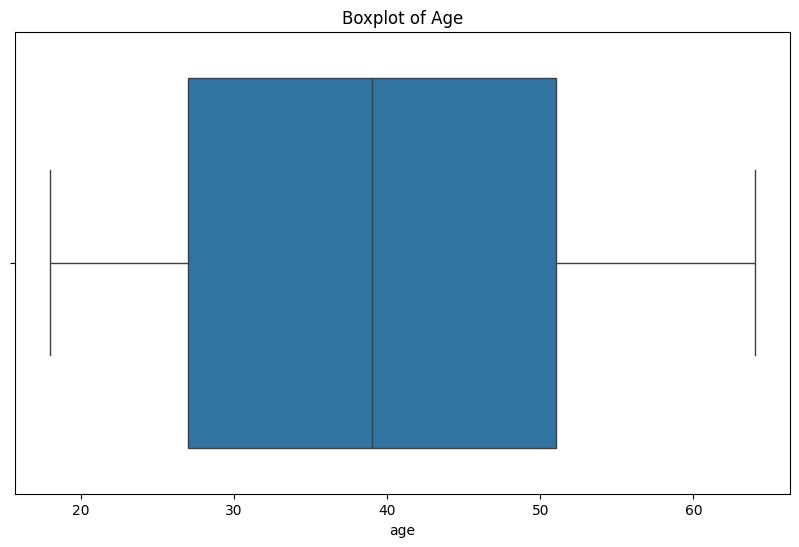

Mean Squared Error: 33635210.43117845
R^2 Score: 0.7833463107364536


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('/content/insurance.csv')

# Plotting the age column to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['age'])
plt.title('Boxplot of Age')
plt.show()

# Handling outliers in the age column using IQR method
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Removing outliers
cleaned_data = data[(data['age'] >= lower_bound) & (data['age'] <= upper_bound)]

# Encode categorical columns
label_encoder = LabelEncoder()
cleaned_data['sex'] = label_encoder.fit_transform(cleaned_data['sex'])
cleaned_data['smoker'] = label_encoder.fit_transform(cleaned_data['smoker'])
cleaned_data['region'] = label_encoder.fit_transform(cleaned_data['region'])

# Define features and target variable
X = cleaned_data.drop(columns=['charges'])
y = cleaned_data['charges']

# Standardize features
sc = StandardScaler()
X = sc.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')